In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
data = pd.read_csv('/content/Ecommerce Customers.csv')

In [ ]:
data.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


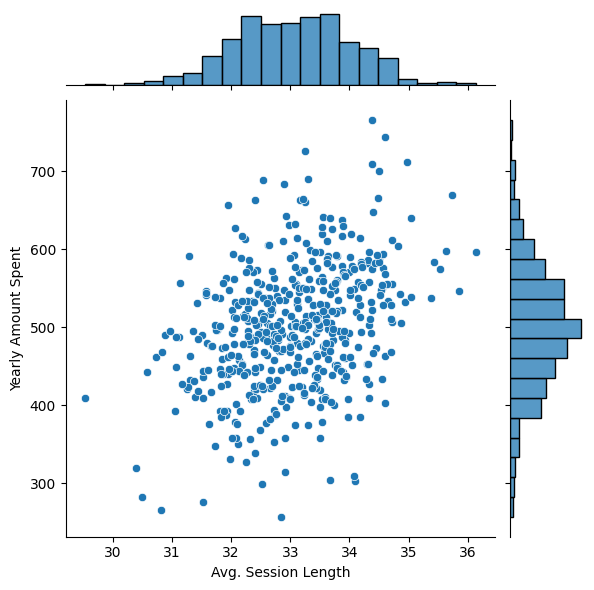

In [ ]:
sns.jointplot(x='Avg. Session Length',y='Yearly Amount Spent',data=data)

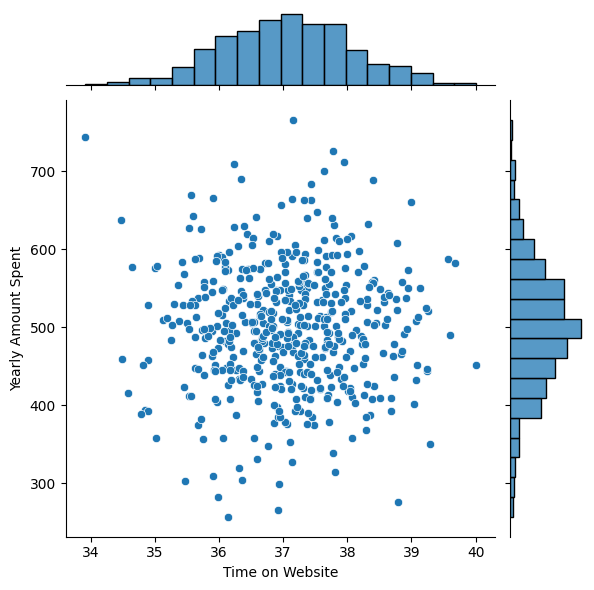

In [ ]:
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=data)


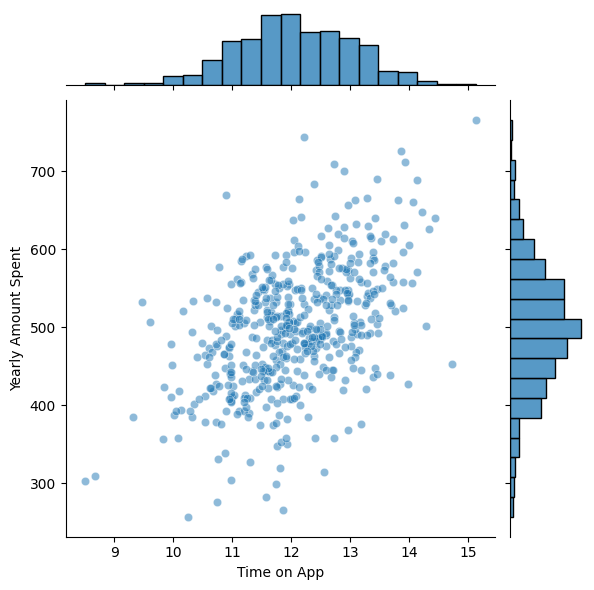

In [ ]:
sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=data,alpha=0.5)

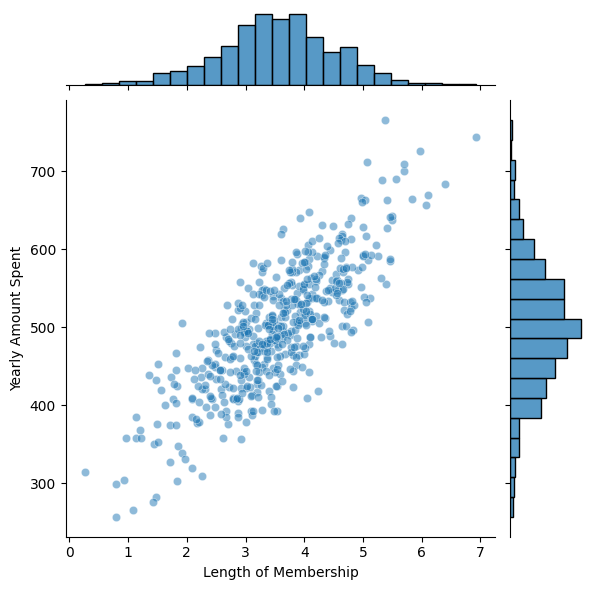

In [ ]:
sns.jointplot(x='Length of Membership',y='Yearly Amount Spent',data=data,alpha=0.5)

In [ ]:
# Selecting "Length of Membership" as the single important feature
X = data[['Length of Membership']].values
y = data['Yearly Amount Spent'].values


In [ ]:
# Standardize the feature
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X_standardized = (X - X_mean) / X_std

In [ ]:
# Add a column of ones to X to account for theta_0 (intercept term)
X_standardized = np.c_[np.ones(X_standardized.shape[0]), X_standardized]

# Initialize parameters
theta = np.zeros(X_standardized.shape[1])

In [ ]:
# Define the hypothesis
def hypothesis(X, theta):
    return np.dot(X, theta)


In [ ]:
# Define the cost function
def cost_function(X, y, theta):
    m = len(y)
    return (1 / (2 * m)) * np.sum((hypothesis(X, theta) - y) ** 2)

In [ ]:
def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    cost_history = np.zeros(iterations)

    for i in range(iterations):
        theta = theta - (alpha / m) * np.dot(X.T, (hypothesis(X, theta) - y))
        cost_history[i] = cost_function(X, y, theta)

    return theta, cost_history

In [ ]:
alpha = 0.01
iterations = 1000

In [ ]:
theta, cost_history = gradient_descent(X_standardized, y, theta, alpha, iterations)

In [ ]:
print("Optimum values of the parameters (theta):", theta)
print("Learning Rate:", alpha)
print("Number of Iterations:", iterations)

Optimum values of the parameters (theta): [499.29248225  64.10531444]
Learning Rate: 0.01
Number of Iterations: 1000


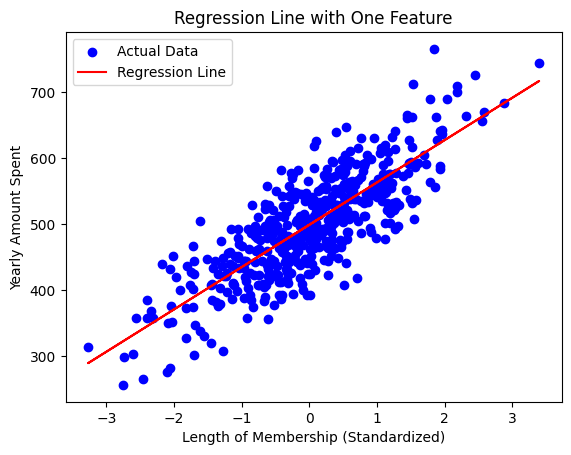

In [ ]:
plt.scatter(X_standardized[:, 1], y, color='blue', label='Actual Data')
# Calculate the predicted values using the optimal theta
y_pred = hypothesis(X_standardized, theta)

# Plot the straight regression line
plt.plot(X_standardized[:, 1], y_pred, color='red', label='Regression Line')
plt.xlabel('Length of Membership (Standardized)')
plt.ylabel('Yearly Amount Spent')
plt.title('Regression Line with One Feature')
plt.legend()
plt.show()


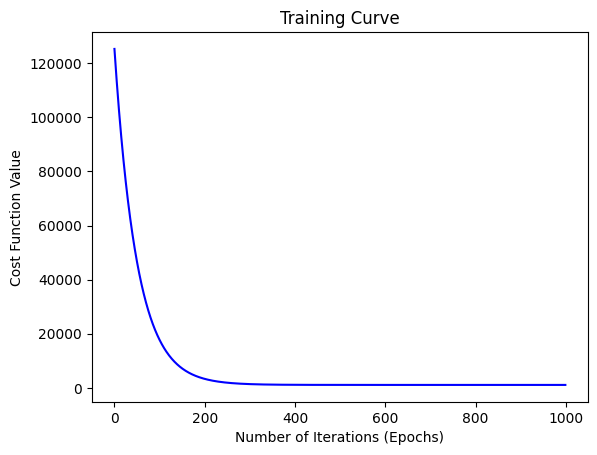

In [ ]:
# Step 9: Plot the training curve (No of epochs Vs cost)
plt.plot(range(iterations), cost_history, color='blue')
plt.xlabel('Number of Iterations (Epochs)')
plt.ylabel('Cost Function Value')
plt.title('Training Curve')
plt.show()


In [ ]:
sample_test_cases = np.array([[4.0], [3.5]])  # Example test cases
sample_test_cases_standardized = (sample_test_cases - X_mean) / X_std
sample_test_cases_standardized = np.c_[np.ones(sample_test_cases_standardized.shape[0]), sample_test_cases_standardized]

predicted_values = hypothesis(sample_test_cases_standardized, theta)

print("Sample Test Cases (Length of Membership):", sample_test_cases.flatten())
print("Predicted Yearly Amount Spent:", predicted_values)

Sample Test Cases (Length of Membership): [4.  3.5]
Predicted Yearly Amount Spent: [529.25167388 497.14371792]
